# Interpolation

## Polynomiale Interpolation

Suche ein Polynom $p$ vom Grad $n$,

$$ P(x) = p_0 x^n + p_1 x^{n-1} + \ldots + p_{n-1} x + p_n, $$

dass durch die $n+1$ Punkte $(x_k,\, y_k)_{k=0}^n$ geht, d.h.

$$ P(x_k) = y_k \qquad \forall 0 \leq k \leq n. $$

Dies führt auf ein lineares Gleichungssystem $V p = y$ mit

$$ V = \begin{pmatrix}
x_0^n & x_0^{n-1} & \dots & x_0 & 1 \\
x_1^n & x_1^{n-1} & \dots & x_1 & 1 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
x_{n-1}^n & x_{n-1}^{n-1} & \dots & x_{n-1} & 1 \\
x_n^n & x_n^{n-1} & \dots & x_n & 1
\end{pmatrix},
\qquad p = \begin{pmatrix}
p_0 \\ p_1 \\ \vdots \\ p_{n-1} \\ p_n
\end{pmatrix},
\qquad y = \begin{pmatrix}
y_0 \\ y_1 \\ \vdots \\ y_{n-1} \\ y_n
\end{pmatrix}. $$

$V$ ist eine *Vandermonde-Matrix*.

```python
numpy.vander(x, m)
```
erzeugt die Vandermonde-Matrix mit `m` Spalten (d.h. mit Ordnung `n = m-1`) für die Stützstellen `x`.

#### Hinweis

Üblicherweise werden Polynome in der Form $P(x) = \sum_{k=0}^n p_k x^k$ dargestellt. In NumPy ist die Reihenfolge der Koeffizienten demgegenüber vertauscht; $p_0$ ist z.B. der Koeffizient der höchsten Potenz. `np.vander` berechnet die Vandermonde-Matrix in dieser unüblichen Reihenfolge. Will man das vermeiden, kann man `increasing=True` an `vander` übergeben.

#### Beispiel

Interpolation von $y_k = (1 + x_k^2)^{-1}$ mit `x = linspace(-5, 5, 13)`.

In [1]:
from numpy import linspace, vander
from scipy.linalg import solve

interp_x = linspace(-5, 5, 13)
interp_y = 1 / (1 + interp_x**2)

V = vander(interp_x, 13)

p = solve(V, interp_y)
p

array([ 3.72685037e-06, -4.06179456e-20, -2.39243089e-04,  1.88825644e-18,
        5.63649022e-03, -2.79466825e-17, -6.11438930e-02,  1.67970889e-16,
        3.17957350e-01, -3.79353050e-16, -7.83313429e-01,  2.28388736e-16,
        1.00000000e+00])

## `poly1d`

```python
numpy.poly1d(coeffs)
```

nimmt eine Koeffizienten-Liste oder -Array und erzeugt ein `poly1d`-Objekt, dass das entsprechende Polynom repräsentiert. Insbesondere lässt sich dieses Objekt wie eine Funktion an beliebigen Punkten auswerten. Ausserdem sind Polynom-Multiplikation und Division möglich.

```python
numpy.poly1d(roots, True)
```
erzeugt ein Polynom, dass `roots` als Nullstellen hat.

Die Koeffizienten sind umgekehrt über das Attribut `.coeffs` verfügbar.

#### Beispiel: Plot des Interpolationspolynoms

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
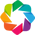

In [1]:
# Hilfsfunktion zum Plotten

import holoviews as hv
hv.extension('bokeh')
plot_x = linspace(-5, 5, 150)

def plot_with_points(f, label=None):
    options = {'Points' : dict(size=7, show_grid=True)}
    return (hv.Curve((plot_x, f(plot_x))) * hv.Points((interp_x, interp_y)).options(options)).relabel(label)

In [1]:
from numpy import poly1d

P = poly1d(p)

print('P(4.5) = {}'.format(P(4.5)))

plot_with_points(P, 'Polynominterpolation')

P(4.5) = -2.083395530258125


:Overlay
   .Curve.I  :Curve   [x]   (y)
   .Points.I :Points   [x,y]

#### Beispiel: Polynomdivision

In [1]:
# Polynom mit 3 Nullstellen
P1 = poly1d([-1, 1, 2], True)

# Linearfaktor für Nullstelle 2
P2 = poly1d([1, -2])

quotient, remainder = P1 / P2

# Quotient hat Nullstellen -1 und 1
print(quotient)

# Rest ist 0
print(remainder)

   2
1 x - 1
 
0


Für komplexere Polynom-Algebra sollte man allerdings eher SymPy verwenden.

### Nullstellen berechnen

... geht mit
```python
numpy.roots(poly)
```

In [1]:
from numpy import roots

rs = roots(P)
print(rs)

[ 4.99899715+0.j          4.18053426+0.j         -4.99899715+0.j
  3.19858046+0.j          2.83327787+0.j          1.49493794+0.70726733j
  1.49493794-0.70726733j -4.18053426+0.j         -3.19858046+0.j
 -2.83327787+0.j         -1.49493794+0.70726733j -1.49493794-0.70726733j]


In [1]:
max(abs(P(rs)))

6.767919558114954e-13

## Interpolation mit SciPy

### Polynome

Für Polynominterpolation bietet SciPy zwei verschiedene Implementierungen.

```python
scipy.interpolate.BarycentricInterpolator(x, y)
scipy.interpolate.KroghInterpolator(x, y)
```

Beide liefern ein Objekt zurück, dass sich wie eine Funktion zum auswerten an beliebigen Punkten nutzen lässt.

In [1]:
from scipy.interpolate import BarycentricInterpolator

P = BarycentricInterpolator(interp_x, interp_y)
print('P(4.5) = {}'.format(P(4.5)))

P(4.5) = -2.083395530258173


### Splines

Polynome sind zum Interpolieren oft nicht gut geeignet. Als Alternative kann man *stückweise* Polynome verwenden.

Eine Spline-Funktion der Ordnung $n$ zu den Stützstellen $(x_k, y_k)_{k=0}^{m-1}$ ist eine Funktion $f \colon [x_0,\, x_{m-1}] \to \mathbb{R}$, die folgende Bedingungen erfüllt:

- $f(x_k) = y_k$ für alle $0 \leq k \leq m-1$.
- $f$ ist $(n-1)$-mal stetig differenzierbar: $f \in C^{n-1}([x_0,\, x_{m-1}])$.
- Für jedes Teilintervall $I_k = [x_k,\, x_{k+1}]$ ($0 \leq k < m-1$) ist die Einschränkung $f|_{I_k}$ ein Polynom von Ordnung höchstens $n$.

In Python
```python
scipy.interpolate.interp1d(x, y, kind='linear')
```
Möglichkeiten für `kind`:

- `'nearest'`: *Nearest Neighbour* Interpolation (stückweise konstant, kein Spline)
- `'zero'`: Spline 0. Ordnung (stückweise konstante Splines)
- `'linear'`: Spline 1. Ordnung
- `'quadratic'`: Spline 2. Ordung
- `'cubic'`: Spline 3. Ordnung
- Ein Integer `k` legt allgemein die Spline-Ordnung fest (auch größer als 3).

Höhere Ordnungen führen nicht zwangsläufig zu besseren Ergebnissen.

In [1]:
from scipy.interpolate import interp1d

kinds = ['nearest', 'linear', 'quadratic', 'cubic', 5, 7]        

hv.Layout([plot_with_points(interp1d(interp_x, interp_y, kind=kind),'{}. Ordnung'.format(kind)) for kind in kinds]).cols(3)

:Layout
   .Overlay.Nearest_full_stop_Ordnung   :Overlay
      .Curve.I  :Curve   [x]   (y)
      .Points.I :Points   [x,y]
   .Overlay.Linear_full_stop_Ordnung    :Overlay
      .Curve.I  :Curve   [x]   (y)
      .Points.I :Points   [x,y]
   .Overlay.Quadratic_full_stop_Ordnung :Overlay
      .Curve.I  :Curve   [x]   (y)
      .Points.I :Points   [x,y]
   .Overlay.Cubic_full_stop_Ordnung     :Overlay
      .Curve.I  :Curve   [x]   (y)
      .Points.I :Points   [x,y]
   .Overlay.A_5_full_stop_Ordnung       :Overlay
      .Curve.I  :Curve   [x]   (y)
      .Points.I :Points   [x,y]
   .Overlay.A_7_full_stop_Ordnung       :Overlay
      .Curve.I  :Curve   [x]   (y)
      .Points.I :Points   [x,y]

## Fitting

Bei der Polynom-Interpolation muss die Anzahl $m$ der Stützstellen übereinstimmen mit der Anzahl $n+1$ der unbekannten Koeffizienten eines Polynoms vom Grad $n$.

Oft tritt der Fall auf, dass man viele Punkte hat (möglicherweise mit Messfehlern o.ä.) und die Daten durch eine Funktion niedriger Ordnung $n < m - 1$ approxmativ beschreiben will. Statt $P(x_k) = y_k$ kann man dann z.B. ein quadratisches Ausgleichsproblem lösen und $P$ so bestimmmen, dass es

$$ \sum_{k=0}^m \left| P(x_k) - y_k \right|^2 = \left\| V p - y \right\|^2$$

unter allen Polynomen vom Grad $n$ minimiert. Hier ist $V$ die $m \times (n+1)$ Vandermonde-Matrix. Man kann zeigen, dass die Koeffizienten $p$ dann anstelle der Interpolationsgleichung $V p = y$ die *Optimalitätsbedingung*

$$ V^T V p = V^T y $$

erfüllen.

#### Beispiel: Fitting eines Polynoms vom Grad $n = 6$

In [1]:
V = vander(interp_x, 7)
P = poly1d(solve(V.T @ V, V.T @ interp_y))

plot_with_points(P, 'Polynom-Fit')

:Overlay
   .Curve.I  :Curve   [x]   (y)
   .Points.I :Points   [x,y]

### Fitting mit NumPy

Polynomielles Fitting eines Polynoms $n$-ter Ordnung geht mit

```python
numply.polyfit(x, y, n)
```

Das Resultat ist ein Koeffizienten-Array, aus dem man mit `poly1d` ein Polynom-Objekt erzeugen kann.

In [1]:
from numpy import polyfit

P = poly1d(polyfit(interp_x, interp_y, 6))

plot_with_points(P, 'Polynom-Fit')

:Overlay
   .Curve.I  :Curve   [x]   (y)
   .Points.I :Points   [x,y]

### Fitting mit Splines

Mit Splines kann man auch Daten fitten. Dafür sucht man eine Lösung die nicht mehr exakt durch die Punkte geht, sondern nur noch im Sinne der kleinsten Quadrate optimal ist.

``` python
scipy.optimize.UnivariateSpline(x, y, s=None)
```

- `x,y`: wie gehabt die Datenpunkte die bekannt sind
- `s`: Glättungsfaktor (*smoothing factor*); steuert wieviele Punkte für die Splineinterpolation genutzt werden. Kleiner bedeutet mehr Punkte.


In [1]:
from scipy.interpolate import UnivariateSpline
f = UnivariateSpline(interp_x, interp_y)
plot_with_points(f, 'Spline-Fit')

:Overlay
   .Curve.I  :Curve   [x]   (y)
   .Points.I :Points   [x,y]

In [1]:
f = UnivariateSpline(interp_x, interp_y, s=0.2)
plot_with_points(f, 'Spline-Fit')

:Overlay
   .Curve.I  :Curve   [x]   (y)
   .Points.I :Points   [x,y]

## Interpolation in 2d

### Rechteckige Gitter

```python
scipy.interpolate.interp2d(x, y, z, kind='linear')
```
bestimmt eine Funktion `f`, so dass `f(x, y) == z`. Dabei sollten die Werte auf einem rechteckigen Gitter gegeben sein. `x` und `y` können entweder nur die Achsen-Werte angeben (dann ist `x.size * y.size == z.size`) oder die kompletten Gitter (dann ist `x.size == y.size == z.size`). Im letzteren Fall muss man selbst darauf achten, dass das Gitter rechteckig ist.

`kind` kann hier die Werte `'linear'`, `'cubic'` oder `'quintic'` haben.

Der Rückgabewert ist, wie bei `interp1d`, aufrufbar wie eine Funktion.

### Unstrukturierte Punkte

```python
scipy.interpolate.griddata(points, values, xi, method='linear')
```
interpoliert von Werten, die auf einer beliebigen Menge von Punkten gegeben sind. Anders als bei `interp1d` und `interp2d` kann man die interpolierte Funktion nicht auf beliebigen Punkten auswerten. Stattdessen muss man alle Punkte, auf die man interpolieren will, beim Aufruf mit angeben.

- `points`: `(n, 2)`-Array von Punkten
- `values`: `(n,)`-Array von Funktionswerten an den Punkten
- `xi`: `(m, 2)`-Array von Punkten, auf die interpoliert werden soll
- `method`: `'nearest'`, `'linear'` oder `'cubic'`

Allgemeiner funktionieren auch Daten in `d` Dimensionen, wenn `points` und `xi` Shape `(n, d)` bzw. `(m, d)` haben.

Für die `'linear'`- und `'cubic'`-Methoden kann nur auf die *konvexe Hülle* der gegebenen `points` interpoliert werden. An anderen Punkten von `xi` wird `NaN` zurückgegeben. Für den Umgang damit kann die Funktion `numpy.isnan` nützlich sein (s.u.).


In [1]:
from numpy import sin, cos, pi, array, vstack, flip
from numpy.random import random
from numpy import mgrid

def f(x, y):
    return cos(4*pi*x) * sin(4*pi*y)

# Sampling-Punkte
points = random((100, 2))
values = f(*points.T)

# Punkte, auf die interpoliert wird
X, Y = mgrid[0:1:50j, 0:1:50j]

In [1]:
options = {'Scatter': dict(color_index=2, size=10)}
# Richtige Achsen für Image
imrange = (X.min(), Y.min(), X.max(), Y.max())
hv.Image(flip(f(X,Y),1).T, bounds=imrange) + hv.Scatter(vstack((points.T,values)).T, vdims=['y', 'color']).options(options)

:Layout
   .Image.I   :Image   [x,y]   (z)
   .Scatter.I :Scatter   [x]   (y,color)

In [1]:
from scipy.interpolate import griddata
from numpy import c_

xi = c_[X.ravel(), Y.ravel()] # concatenate on second axis

gr = []
for method in ['nearest', 'linear', 'cubic']:
    p = griddata(points, values, xi, method=method)
    p = p.reshape(X.shape) # Wieder in Form bringen für die Darstellung
    gr.append(hv.Image(flip(p,1).T, bounds=imrange) * hv.Scatter(points))
    
hv.Layout(gr)

:Layout
   .Overlay.I   :Overlay
      .Image.I   :Image   [x,y]   (z)
      .Scatter.I :Scatter   [x]   (y)
   .Overlay.II  :Overlay
      .Image.I   :Image   [x,y]   (z)
      .Scatter.I :Scatter   [x]   (y)
   .Overlay.III :Overlay
      .Image.I   :Image   [x,y]   (z)
      .Scatter.I :Scatter   [x]   (y)

Umgang mit `NaN`, z.B. Fortsetzen als 0 auf Aussenbereich:

In [1]:
from numpy import isnan

p[isnan(p)] = 0
hv.Image(p, bounds=imrange)

:Image   [x,y]   (z)

## Exkurs: Indizieren mit Boolschen Masken

Arrays können auch durch sogenannte **Boolsche Masken** indiziert werden, d.h. Arrays aus `True`/`False`-Werten, die dieselbe Größe haben wie das zu indizierenden Array. Das resultierende Array ist 1-dimensional und enthält nur die Werte, an der die Maske `True` ist.

Das ist besonders nützlich in Verbindung mit Vergleichsoperatoren, deren Resultat Bool-Arrays sind (s.o.).

In [1]:
from numpy import arange, array

a = arange(25).reshape((5, 5))
a % 2 == 0

array([[ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True]])

In [1]:
b = a[a % 2 == 0]
b

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24])

Masken können auch auf der linken Seite einer Zuweisung verwendet werden.

In [1]:
a[a % 2 == 0] = -1
a

array([[-1,  1, -1,  3, -1],
       [ 5, -1,  7, -1,  9],
       [-1, 11, -1, 13, -1],
       [15, -1, 17, -1, 19],
       [-1, 21, -1, 23, -1]])

Darüber hinaus können Masken auch nur entlang einer einzelnen Achse eingesetzt werden.

In [1]:
a = arange(25).reshape((5, 5))
mask = array([True, True, False, True, False])

a[mask, :]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [15, 16, 17, 18, 19]])

#### Reduktionen boolscher Arrays

```python
array_object.all(axis=None)
array_object.any(axis=None)
```
`all` liefert `True`, falls *alle* Elemente entlang der jeweiligen Achse `True` sind. `any` liefert `True`, falls *mindestens ein* Element `True` ist.

Das `axis`-Argument funktioniert wie bei anderen Reduktionen (`sum`, `mean`, etc).

In [1]:
a = arange(25).reshape(5, 5)
print(a)
(a <= 2).any(axis=0)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


array([ True,  True,  True, False, False])